In [17]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time

In [18]:
x_train, y_train, x_test, y_test = lstm.load_data("sp500.csv", 50, True)

In [19]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.1630570888519287


In [22]:
#Step 3 Train the model
model.fit(
    x_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3522 samples, validate on 186 samples
Epoch 1/1
3522/3522 [==============================] - 12s - loss: 0.0026 - val_loss: 9.3556e-04


In [23]:
predictions = lstm.predict_sequences_multiple(model, x_test, 50,50)

yo


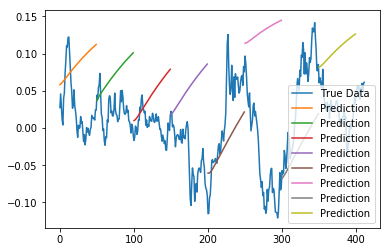

In [24]:
lstm.plot_results_multiple(predictions, y_test, 50)